In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Preparation

In [147]:
# Data Reading & Cleansing

data = pd.read_csv('data/aol_data.csv')
data = data.transpose()
data = data.reset_index()
data.columns = ['Month', 'Production']
data['Month'] = data['Month'].str.replace('M', '').astype(int)
x = np.array(data['Month'], dtype=float)
y = np.array(data['Production'], dtype=float)
data

,Month,Production
0,1,1863
1,2,1614
2,3,2570
3,4,1685
4,5,2101
...,...,...
139,140,16782
140,141,16716
141,142,17033
142,143,16896


Scatter Plot as Visualization

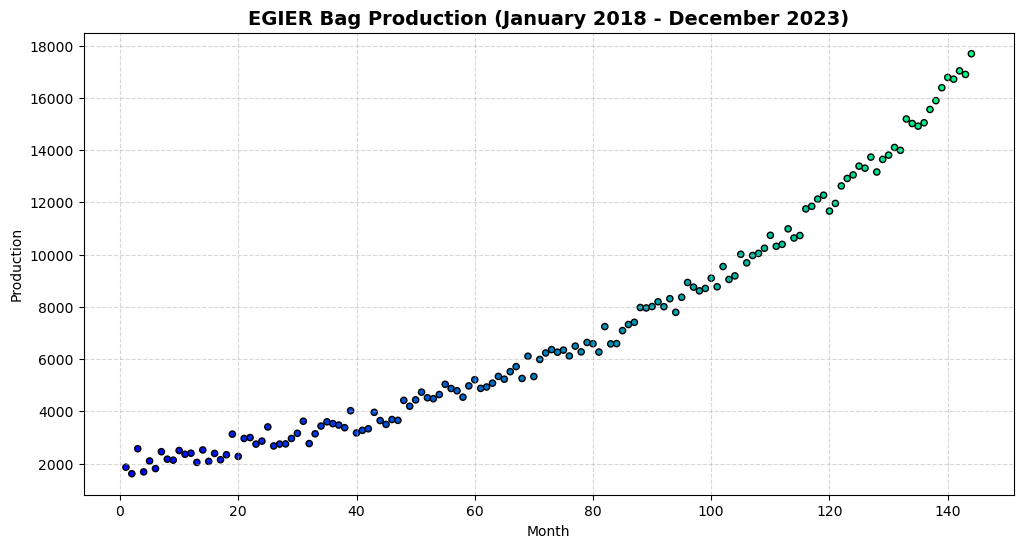

In [148]:
plt.figure(figsize=(12,6))
plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=1)
plt.title("EGIER Bag Production (January 2018 - December 2023)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=10)
plt.ylabel("Production", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. Polynomial Regression

y = 100.675683x^1 + -141.035645x^0


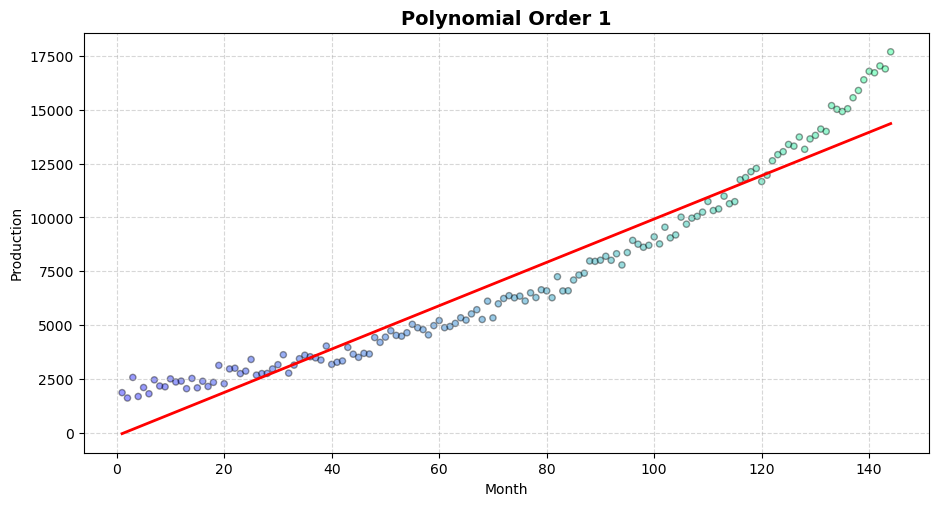

y = 0.705904x^2 + -1.680422x^1 + 2349.629590x^0


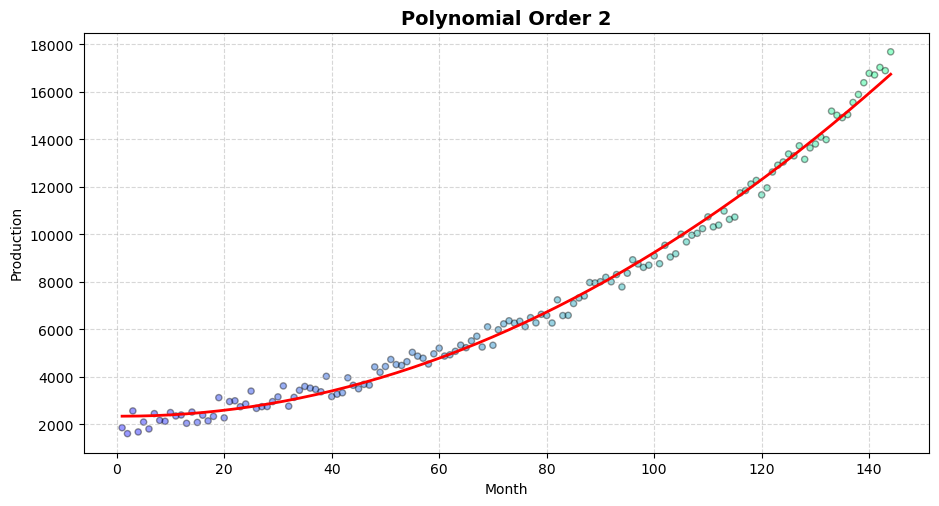

y = 0.003863x^3 + -0.134357x^2 + 47.223553x^1 + 1748.506723x^0


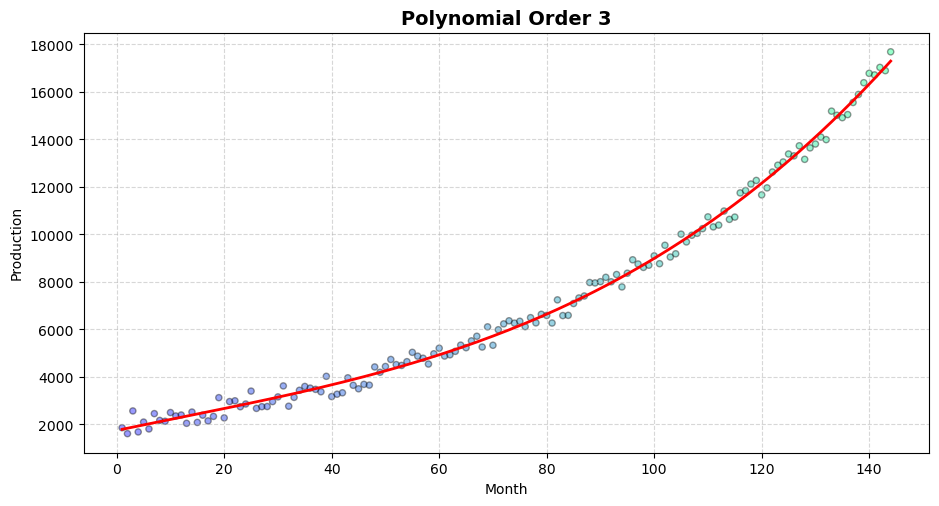

In [149]:
# Polynomial Regression

for i in range(1,4):
    
    plt.figure(figsize=(24,12))
    plt.subplot(2, 2, i)
    plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=0.4)
    
    y_est = np.polyfit(x, y, i)
    
    eq = "y = " + " + ".join([f"{coef:.6f}x^{len(y_est)-j-1}" for j, coef in enumerate(y_est)])
    print(eq)
    
    plt.plot(x, np.polyval(y_est,x), color='red', linewidth=2)
    plt.title(f"Polynomial Order {i}", fontsize=14, fontweight='bold')
    plt.xlabel("Month", fontsize=10)
    plt.ylabel("Production", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    

In [150]:
# Polynomial Regression using the Matrix Formula

# Construct the M matrix for cubic polynomial (1, x, x^2, x^3)
M = np.column_stack((np.ones_like(x), x, x**2, x**3))
Y = y.reshape(-1, 1)
V = np.linalg.inv(M.T @ M) @ M.T @ Y

print("Coefficient vector V:")
print(V)

Coefficient vector V:
[[ 1.74850672e+03]
 [ 4.72235525e+01]
 [-1.34357030e-01]
 [ 3.86326992e-03]]


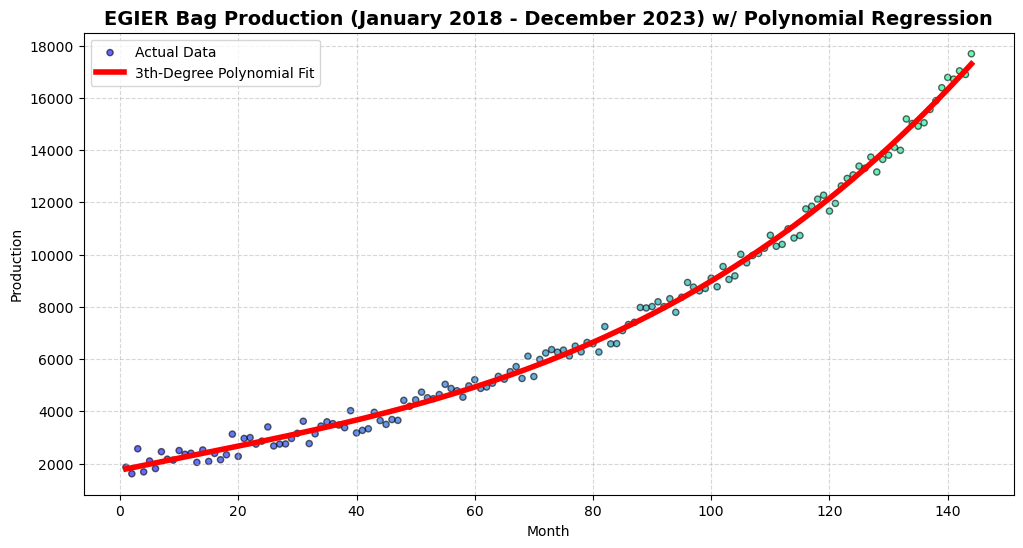

In [151]:
# Polynomial coefficients (highest degree first)
coeffs = [0.003863, -0.134357, 47.223553, 1748.506723]

y_pred = np.polyval(coeffs, x)

plt.figure(figsize=(12,6))
plt.scatter(x, y, c=x, cmap='winter', edgecolors="black", s=20, alpha=0.6, label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=4, label='3th-Degree Polynomial Fit')
plt.title("EGIER Bag Production (January 2018 - December 2023) w/ Polynomial Regression", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=10)
plt.ylabel("Production", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [152]:
# Actual data
y_true = np.array(data['Production'])

y_pred = np.polyval(coeffs, x)

mse = np.mean((y_true - y_pred)**2)
r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

print("Mean Squared Error (MSE):", mse)
print("R^2 =", r2)

Mean Squared Error (MSE): 83195.22187393636
R^2 = 0.9955827569999465


2. Newthon-Raphson Method

In [153]:
def f(x):
    return np.polyval(coeffs, x) - 25000

def f_prime(x):
    dcoeffs = np.polyder(coeffs)
    return np.polyval(dcoeffs, x)

x = 140 
tol = 1e-6

# Newton–Raphson iteration
for i in range(20):
    x_new = x - f(x) / f_prime(x)
    if abs(x_new - x) < tol:
        break
    x = x_new

print(f"Predicted month when production reaches 25,000: {x:.2f}")
print(f"Recommended start for new warehouse construction: {x - 13:.2f}")

Predicted month when production reaches 25,000: 170.38
Recommended start for new warehouse construction: 157.38


3. Numerical Differentiation

In [159]:
# Step size
h = x[1] - x[0]

dy_dx = np.zeros_like(y, dtype=float)

# Forward difference for first point
dy_dx[0] = (y[1] - y[0]) / h

# Central difference for interior points
for i in range(1, len(y)-1):
    dy_dx[i] = (y[i+1] - y[i-1]) / (2 * h)

# Backward difference for last point
dy_dx[-1] = (y[-1] - y[-2]) / h

max_month = x[np.argmax(dy_dx)]
min_month = x[np.argmin(dy_dx)]

print(f"Steepest increase at month {max_month}: {dy_dx.max():.2f} bags/month")
print(f"Steepest decrease at month {min_month}: {dy_dx.min():.2f} bags/month")


Steepest increase at month 144: 793.00 bags/month
Steepest decrease at month 40: -376.50 bags/month


4. Numerical Integration

In [ ]:
# Step size
h = x[1] - x[0]

# Trapezoidal Rule Formula
total_area = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
print(f"Estimated total production (2018 - 2023): {total_area:.2f} bags")

Steepest increase at month 144: 793.00 bags/month
Steepest decrease at month 40: -376.50 bags/month


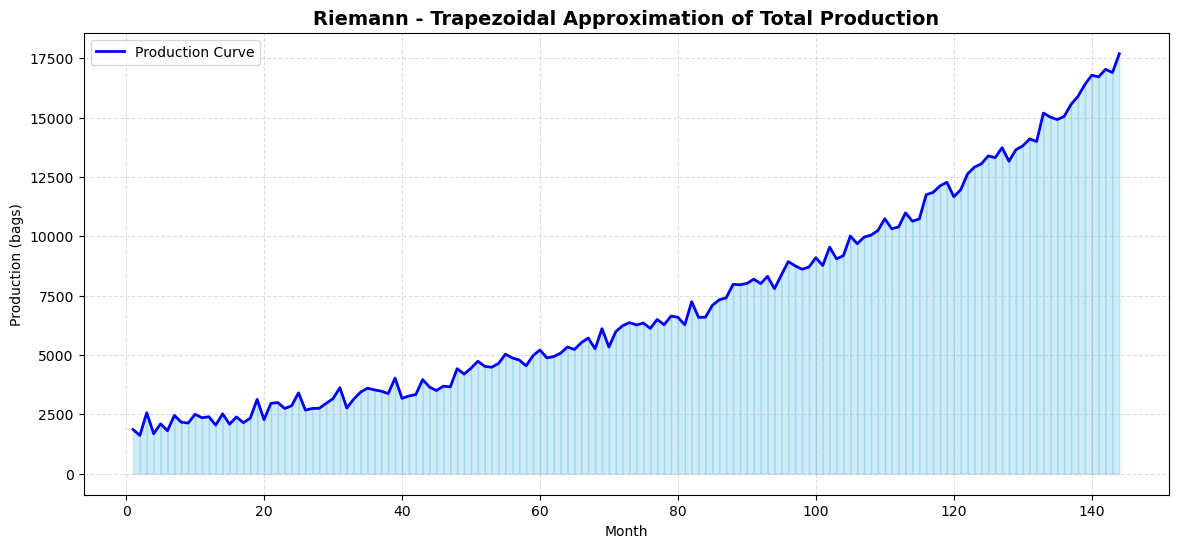

In [156]:
plt.figure(figsize=(14,6))
plt.plot(x, y, 'b-', linewidth=2, label='Production Curve')
plt.title("Riemann - Trapezoidal Approximation of Total Production", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Production (bags)")
plt.grid(True, linestyle='--', alpha=0.4)

for i in range(len(x)-1):
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color='skyblue', alpha=0.4)

plt.legend()
plt.show()

In [157]:
# Actual total from dataset
total_production = np.sum(y)
print("Actual Total Production =", total_production)

# Compare trapezoidal estimate vs actual sum
error = (total_production - total_area) / total_production * 100

print(f"Error = {error:.2f} %")
print(f"Accuracy = {100 - error:.2f} %")

Actual Total Production = 1030745.0
Error = 0.95 %
Accuracy = 99.05 %
